The Machine learing Algorithms
- Linear regression
- Logistic regression
- Decision Trees
- Random Forest
- Support Vector Machines
- K-Nearest neighbours
- Gradient Boosting Machines


In [2]:
# import the libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
#Load the dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

In [4]:
# Split the data into trian test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


In [5]:
# train the model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [6]:
# Make predictions
y_pred = log_reg.predict(X_test)

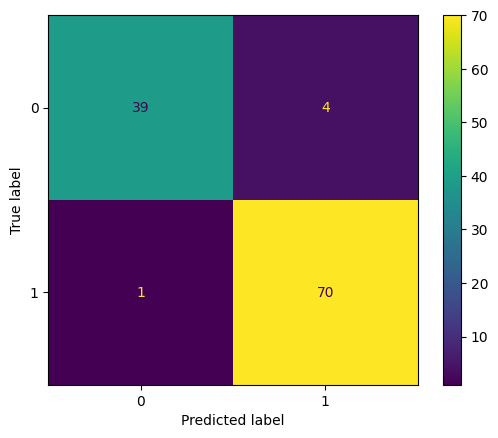

In [7]:
# Evalaute the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion maatrix
cm = confusion_matrix(y_test, y_pred)

# Display the cofusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Decision Trees

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [9]:
# Load the data
iris = load_iris()
X, y = iris.data, iris.target

In [10]:
# Split the data intoo training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

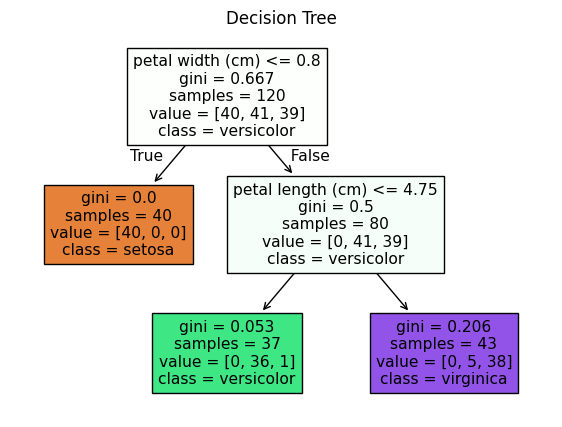

In [12]:
# Plot the decision tree
plt.figure(figsize=(7, 5))
plot_tree(tree_clf, filled = True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree")
plt.show()

# Random Forest

In [13]:
# Import the libraries
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier


In [14]:
#  load the dataset
wine = load_wine()
X, y = wine.data, wine.target


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train the model
forest_clf = RandomForestClassifier(n_estimators=10, random_state=20)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=20)

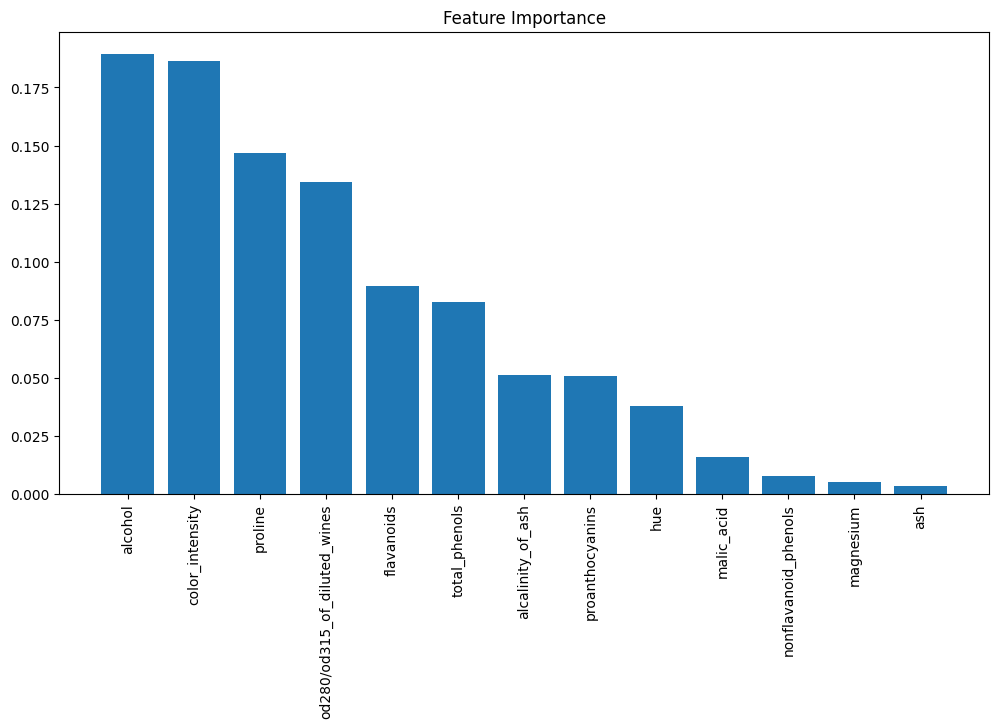

In [17]:
# Getting to look at the feature importance 
# Plot the feature importance 
importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(wine.feature_names)[indices], rotation = 90)
plt.show()

# Support Vector Machines 
### Iris Dataset

In [18]:
from sklearn.svm import SVC

In [20]:
# Load the data
iris = load_iris()
X, y = iris.data[:, :2], iris.target # Using only 2 features for visualization

In [21]:
# Split the data into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# train teh model
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

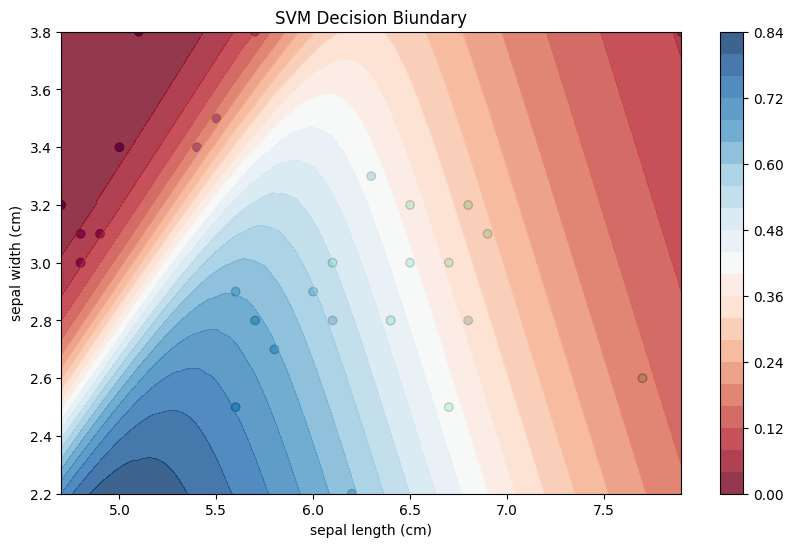

In [23]:
# Plot the decision boundary
plt.figure(figsize=(10,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter', edgecolors='k')
x0, x1 = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:,0].max(), 200),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 200))
grid = np.c_[x0.ravel(), x1.ravel()]
probs = svm_clf.predict_proba(grid)[:,1].reshape(x0.shape)
plt.contourf(x0, x1, probs, 25, cmap="RdBu", alpha = 0.8)
plt.colorbar()
plt.title("SVM Decision Biundary")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()